# Arima Forecasting

## Importing the libraries

In [25]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [26]:
df = pd.read_excel("ts_data/ts_data.xlsx")


In [27]:
print(df.head())

   Employee_ID year_month  Annual_load_cost_per_month
0           57    2000-07                      9329.0
1           57    2000-08                      9329.0
2           57    2000-09                      9329.0
3           57    2000-10                      9329.0
4           57    2000-11                      9329.0


In [28]:
print(df.columns)

Index(['Employee_ID', 'year_month', 'Annual_load_cost_per_month'], dtype='object')


In [29]:
print(df.dtypes)

Employee_ID                     int64
year_month                     object
Annual_load_cost_per_month    float64
dtype: object


In [30]:
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

In [31]:
print(df.dtypes)

Employee_ID                            int64
year_month                    datetime64[ns]
Annual_load_cost_per_month           float64
dtype: object


In [32]:
print(df.shape)

(30000, 3)


In [33]:
print(df['year_month'])

0       2000-07-01
1       2000-08-01
2       2000-09-01
3       2000-10-01
4       2000-11-01
           ...    
29995   2025-02-01
29996   2025-03-01
29997   2025-04-01
29998   2025-05-01
29999   2025-06-01
Name: year_month, Length: 30000, dtype: datetime64[ns]


## 100 Different Data Frame For Individual User

In [34]:
unique_employees = df['Employee_ID'].unique()
print(unique_employees)

[ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156]


In [35]:
employee_dfs = {}

# Step 4: Loop through each employee ID
for emp_id in unique_employees:
    # Step 5: Filter data for just this employee
    emp_df = df[df['Employee_ID'] == emp_id]

    # Step 6: Save it into the dictionary
    employee_dfs[emp_id] = emp_df

In [36]:
individual_emp = employee_dfs[58]
print(individual_emp)

     Employee_ID year_month  Annual_load_cost_per_month
300           58 2000-07-01                     5427.00
301           58 2000-08-01                     5427.00
302           58 2000-09-01                     5427.00
303           58 2000-10-01                     5427.00
304           58 2000-11-01                     5427.00
..           ...        ...                         ...
595           58 2025-02-01                     7743.84
596           58 2025-03-01                     7743.84
597           58 2025-04-01                     7743.84
598           58 2025-05-01                     7743.84
599           58 2025-06-01                     7743.84

[300 rows x 3 columns]


In [37]:
print(individual_emp.shape)

(300, 3)


## Forecasting with SARIMAX But without exogenous variable

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def forecast_sarima(emp_df, steps=12):
    # Step 1: Ensure year_month is datetime
    emp_df['year_month'] = pd.to_datetime(emp_df['year_month'])

    # Step 2: Set date as index and sort
    emp_df = emp_df.sort_values('year_month').set_index('year_month')

    # Step 3: Extract the series
    y = emp_df['Annual_load_cost_per_month']

    # Step 4: Fit SARIMA model
    model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), 
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Step 5: Forecast
    forecast = model_fit.forecast(steps=steps)

    return forecast

In [39]:
employee_forecasts = {}

for emp_id, emp_df in employee_dfs.items():
    try:
        forecast = forecast_sarima(emp_df, steps=12)
        employee_forecasts[emp_id] = forecast
    except Exception as e:
        print(f"Failed for Employee {emp_id}: {e}")

C:\Users\LakshmanNavaneethakr\AppData\Local\Temp\ipykernel_692\800455135.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_df['year_month'] = pd.to_datetime(emp_df['year_month'])
c:\Users\LakshmanNavaneethakr\Downloads\lakshmansierra-git\poc_time_series_analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LakshmanNavaneethakr\Downloads\lakshmansierra-git\poc_time_series_analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LakshmanNavaneethakr

In [40]:
print(type(employee_forecasts))

<class 'dict'>


In [41]:
print(employee_forecasts.items())

dict_items([(np.int64(57), 2025-07-01    13619.087613
2025-08-01    13618.992540
2025-09-01    13634.599174
2025-10-01    13634.599145
2025-11-01    13641.955249
2025-12-01    13641.955269
2026-01-01    13641.955453
2026-02-01    13869.582315
2026-03-01    13874.157540
2026-04-01    13874.157748
2026-05-01    13874.157422
2026-06-01    13874.131651
Freq: MS, Name: predicted_mean, dtype: float64), (np.int64(58), 2025-07-01    7746.633236
2025-08-01    7746.633237
2025-09-01    7746.633237
2025-10-01    7746.633237
2025-11-01    7746.633237
2025-12-01    7747.528119
2026-01-01    7747.528119
2026-02-01    7747.528119
2026-03-01    7747.528119
2026-04-01    7747.528119
2026-05-01    7861.816476
2026-06-01    7861.816470
Freq: MS, Name: predicted_mean, dtype: float64), (np.int64(59), 2025-07-01    13340.802386
2025-08-01    13336.898010
2025-09-01    13333.942914
2025-10-01    13331.688215
2025-11-01    13388.378767
2025-12-01    13387.055132
2026-01-01    13387.421130
2026-02-01    13712.

In [42]:
print(employee_forecasts[156])

2025-07-01    34356.970000
2025-08-01    34356.970000
2025-09-01    34356.970000
2025-10-01    34356.970758
2025-11-01    34356.970758
2025-12-01    34356.970758
2026-01-01    34356.970758
2026-02-01    34356.970758
2026-03-01    44966.180701
2026-04-01    44966.180701
2026-05-01    44966.180701
2026-06-01    44966.180701
Freq: MS, Name: predicted_mean, dtype: float64


## Plot Prediction of Single Employe

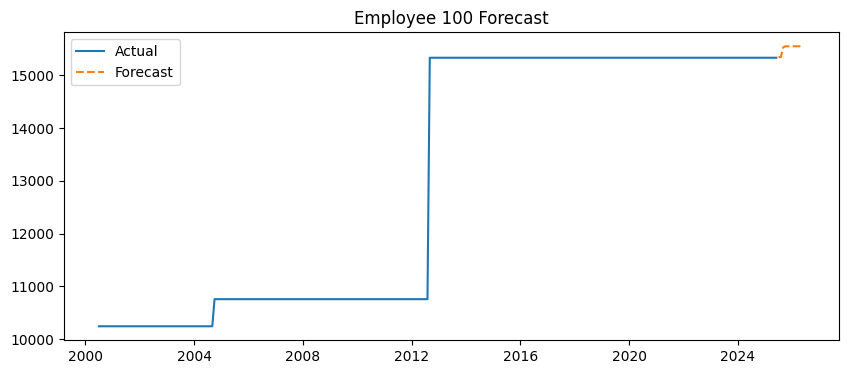

In [43]:
import matplotlib.pyplot as plt

emp_id = 100
emp_df = employee_dfs[emp_id].copy()
emp_df['year_month'] = pd.to_datetime(emp_df['year_month'])
emp_df.set_index('year_month', inplace=True)

forecast = employee_forecasts[emp_id]

plt.figure(figsize=(10, 4))
plt.plot(emp_df['Annual_load_cost_per_month'], label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title(f'Employee {emp_id} Forecast')
plt.legend()
plt.show()

## Saving the Predicted Data

In [47]:
all_forecasts = []

for emp_id, forecast_series in employee_forecasts.items():
    for date, cost in forecast_series.items():
        all_forecasts.append({
            'Employee_ID': emp_id,
            'Upcoming_year_month': date,
            'Forecasted_cost_per_month': round(cost, 0)
        })

forecast_df = pd.DataFrame(all_forecasts)

# Step 4: Sort and reset index (optional but clean)
forecast_df = forecast_df.sort_values(['Employee_ID', 'Upcoming_year_month']).reset_index(drop=True)


In [51]:
print(forecast_df.head())

   Employee_ID Upcoming_year_month  Forecasted_cost_per_month
0           57          2025-07-01                    13619.0
1           57          2025-08-01                    13619.0
2           57          2025-09-01                    13635.0
3           57          2025-10-01                    13635.0
4           57          2025-11-01                    13642.0


In [52]:
forecast_df['Upcoming_year_month'] = pd.to_datetime(forecast_df['Upcoming_year_month']).dt.strftime('%Y-%m')

## Export Updated Excel

In [53]:
# Create the folder if it doesn't exist
os.makedirs("timeseries_data", exist_ok=True)

# Save the Excel file inside the folder
forecast_df.to_excel("timeseries_data/timeseries_data.xlsx", index=False)
